In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
mydata=pd.read_csv("/content/Life Expectancy Data.csv")

In [ ]:
mydata.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# prompt: remove outliers if existed

# Identify numerical features for outlier removal
numerical_features = mydata.select_dtypes(include=np.number).columns

# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remove outliers from each numerical feature
for col in numerical_features:
    mydata = remove_outliers(mydata, col)

# Reset the index after removing rows
mydata.reset_index(drop=True, inplace=True)

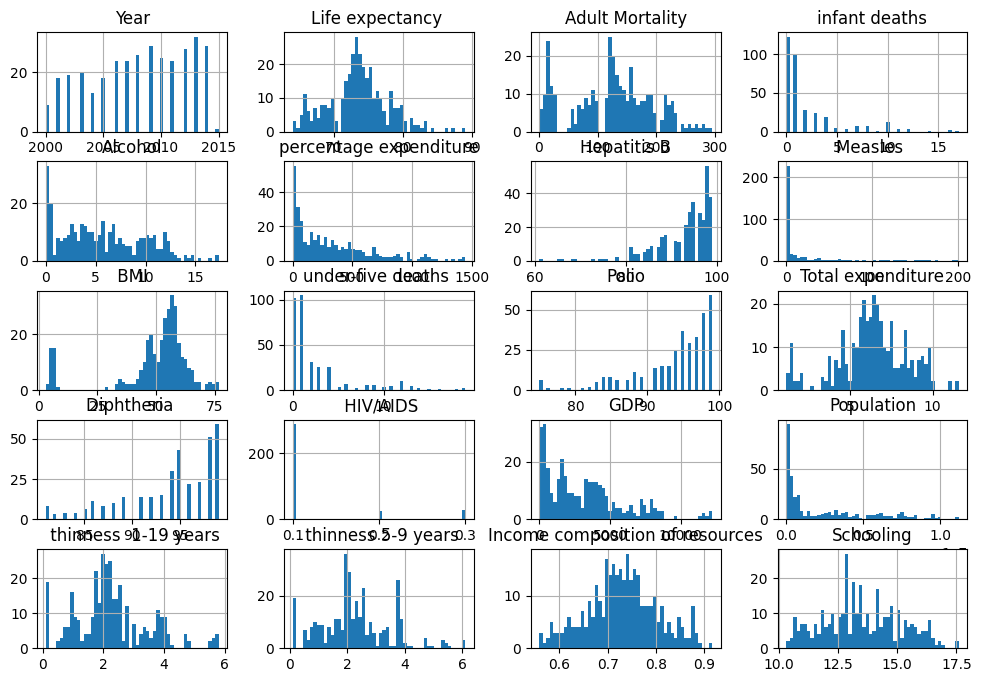

In [ ]:
mydata.hist(bins=50, figsize=(12,8))
plt.show()

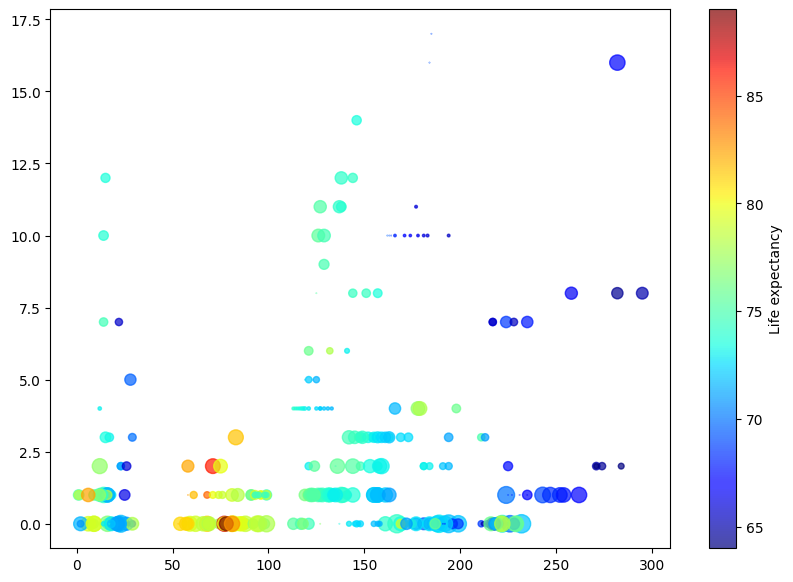

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'mydata' is your Pandas DataFrame containing the Life Expectancy Data

# Create the scatter plot
plt.figure(figsize=(10, 7))  # Set figure size

# Scatter plot with 'Adult Mortality' on x-axis, 'infant deaths' on y-axis,
# 'Life expectancy' as color, and 'Alcohol' as size of points.
scatter = plt.scatter(x=mydata['Adult Mortality'],
                      y=mydata['infant deaths'],
                      c=mydata['Life expectancy '],
                      cmap='jet',
                      s=mydata['Alcohol']*10,  # Adjust size as needed
                      alpha=0.7)

plt.colorbar(label='Life expectancy')  # Add colorbar with label


In [ ]:
mydata.isna().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [ ]:
mydata.dtypes

,0
Country,object
Year,int64
Status,object
Life expectancy,float64
Adult Mortality,float64
infant deaths,int64
Alcohol,float64
percentage expenditure,float64
Hepatitis B,float64
Measles,int64


In [ ]:
X = mydata[['Adult Mortality']]
y = mydata['Life expectancy ']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (e.g., using R-squared)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.24799201364096368


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:

r2_score( y_test, y_pred)

0.24799201364096368

In [ ]:
print(lr.intercept_)


76.91560283614213


In [ ]:
#checking the prediction
lr.predict(X[0:1])













array([74.92986221])

In [ ]:
type(lr)



sklearn.linear_model._base.LinearRegression

In [ ]:
#some bonus points.
#model persistance (saving and loading trained models)
import pickle





In [ ]:
# save
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)

In [ ]:
# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [ ]:
X[0:5]

,Adult Mortality
0,74.0
1,8.0
2,84.0
3,86.0
4,88.0


In [ ]:
clf2.predict(X[0:5])

array([74.92986221, 76.70092817, 74.66151888, 74.60785021, 74.55418155])

In [ ]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

     Actual  Predicted
284    75.0  72.219595
116    74.2  72.434269
113    71.0  71.199890
42     71.9  71.709742
126    68.5  71.253559


Interpretation:

The model appears to be consistent in predicting values close to the actual observations across all five data points.
The predicted values are relatively close to the actual values. For example, the actual value for observation 284 is 75.0, while the predicted value is 72.22. This indicates that the model captures the trend reasonably well, though some degree of error exists.
the linear regression model has a reasonable fit to the data.

This negative r square suggests that the model's predictive ability is very weak and that it does not explain much of the variability in the actual data.

The intercept of the regression model is -76.92, which represents the predicted value of the dependent variable when the independent variable is 0.

It suggests that improvements to the model or data preprocessing are needed before making reliable predictions.

he model might include predictors that don't meaningfully contribute to explaining the variation in the dependent variable.




